**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
suppressMessages(suppressWarnings(library("emmeans")))
show_env()

You are working on        Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
REPO DIRECTORY (FD_REPO): /data/reddylab/Kuei/repo 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/work 
DATA DIRECTORY (FD_DATA): /data/reddylab/Kuei/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/log 
PROJECT REF     (FD_REF): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/references 



**Check: region directory**

In [2]:
txt_fdiry = file.path(FD_RES, "region_coverage_fcc_score")

vec = dir(txt_fdiry)
for (txt in vec){cat(txt, "\n")}

atac_ENCFF333TAT 
atac_ENCFF558BLC 
atac_ENCFF925CYR 
atac_ENCFF948AFM 
dnase_ENCFF185XRG 
dnase_ENCFF274YGF 
fcc_astarr_macs_input_overlap 
fcc_astarr_macs_input_union 


**Check: assay directory**

In [3]:
txt_region = "fcc_astarr_macs_input_union"
txt_fdiry  = file.path(FD_RES, "region_coverage_fcc_score", txt_region)
vec = dir(txt_fdiry)
for (txt in vec) {cat(txt, "\n")}

CRISPRi_FlowFISH_K562_Riley_JinWoo 
CRISPRi_Growth_K562_Gersbach_JinWoo 
MPRA_Lenti_K562_Nadav_Vikram 
MPRA_Tiling_K562_Tewhey_Hannah 
STARR_ATAC_K562_Reddy_KS274 
STARR_ATAC_K562_Reddy_KS91 
STARR_ATAC_K562_Reddy_KSMerge 
STARR_WHG_K562_Reddy_A001 
summary 


**Set global variable**

In [4]:
## init: region folder
vec = c("fcc_astarr_macs_input_overlap", "fcc_astarr_macs_input_union")
names(vec) = vec

VEC_TXT_FOLDER = vec
for (txt in vec) {cat(txt, "\n")}

fcc_astarr_macs_input_overlap 
fcc_astarr_macs_input_union 


In [5]:
vec = c("CRISPRi-HCRFF", "CRISPRi-Growth", "ENCODE-rE2G Benchmark")
names(vec) = vec
VEC_TXT_ASSAY_OUT = vec

vec = c("ASTARR", "WSTARR", "LMPRA", "TMPRA", "ATAC")
names(vec) = vec
VEC_TXT_ASSAY_INP = vec

**Check input files**

In [6]:
txt_folder = VEC_TXT_FOLDER[1]
txt_fdiry  = file.path(FD_RES, "analysis_fcc_correlation", txt_folder)
txt_fname  = "region.coverage.score.*.tsv"
txt_fglob  = file.path(txt_fdiry, txt_fname)

vec = Sys.glob(txt_fglob)
for (txt in vec) {cat(txt, "\n")}

/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/analysis_fcc_correlation/fcc_astarr_macs_input_overlap/region.coverage.score.concat.tsv 


## Import data

In [7]:
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### set file directory
    txt_fdiry  = file.path(FD_RES, "region_closest", txt_folder, "summary")
    txt_fname = "region.summary.genome_tss.tss_proximity.tsv"
    txt_fpath = file.path(txt_fdiry, txt_fname)

    ### read table
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    return(dat)
})

### assign and show
lst_dat_region_tss_proximity_import = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
head(dat, 3)

$fcc_astarr_macs_input_overlap
[1] 304915     11

$fcc_astarr_macs_input_union
[1] 499336     11



Chrom,ChromStart,ChromEnd,Region,Annotation_A,Annotation_B,Region_TSS,Score_Pol2,Gene,Distance2TSS,TSS_Proximity
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>
chr1,10038,10405,chr1:10038-10405,fcc_astarr_macs_input_overlap,genome_tss_pol2,chr1:11873-11874,0.00023,DDX11L1,1469,Proximal
chr1,10038,10405,chr1:10038-10405,fcc_astarr_macs_input_overlap,genome_tss_pol2_rnaseq,chr1:29370-29371,0.00023,WASH7P,18966,Distal
chr1,14282,14614,chr1:14282-14614,fcc_astarr_macs_input_overlap,genome_tss_pol2,chr1:11873-11874,0.00023,DDX11L1,2409,Distal


In [8]:
lst = lst_dat_region_tss_proximity_import
lst = lapply(lst, function(dat){
    dat = dat %>% 
        dplyr::filter(Annotation_B == "genome_tss_pol2") %>%
        dplyr::select(Chrom:Region, TSS_Proximity) %>% 
        dplyr::distinct()
    return(dat)
})

lst_dat_region_tss_proximity_arrange = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
head(dat, 3)

$fcc_astarr_macs_input_overlap
[1] 150042      5

$fcc_astarr_macs_input_union
[1] 246852      5



Chrom,ChromStart,ChromEnd,Region,TSS_Proximity
<chr>,<dbl>,<dbl>,<chr>,<chr>
chr1,10038,10405,chr1:10038-10405,Proximal
chr1,14282,14614,chr1:14282-14614,Distal
chr1,16025,16338,chr1:16025-16338,Proximal


In [9]:
idx = "fcc_astarr_macs_input_union"
lst = lst_dat_region_tss_proximity_arrange
dat = lst[[idx]]

dat_region_tss_proximity_arrange = dat
print(dim(dat))
fun_display_table(head(dat, 3))

[1] 246852      5


Chrom,ChromStart,ChromEnd,Region,TSS_Proximity
chr1,10015,10442,chr1:10015-10442,Proximal
chr1,14253,14645,chr1:14253-14645,Distal
chr1,16015,16477,chr1:16015-16477,Proximal


In [10]:
dat = dat_region_tss_proximity_arrange
print(nrow(dat))

lst = split(dat$Region, dat$TSS_Proximity)
vec_txt_region_proximal = lst[["Proximal"]]
vec_txt_region_distal   = lst[["Distal"]]

vec = vec_txt_region_proximal
print(length(vec))

vec = vec_txt_region_distal
print(length(vec))

[1] 246852
[1] 24120
[1] 222732


In [11]:
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### set file directory
    txt_fdiry  = file.path(FD_RES, "analysis_fcc_correlation", txt_folder)
    txt_fname = "region.coverage.score.concat.tsv"
    txt_fpath = file.path(txt_fdiry, txt_fname)

    ### read table
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    return(dat)
})

### assign and show
lst_dat_region_score_import = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
head(dat, 3)

$fcc_astarr_macs_input_overlap
[1] 586004      8

$fcc_astarr_macs_input_union
[1] 889739      8



Chrom,ChromStart,ChromEnd,Region,Score,Score_Label,Assay_Group,Assay_Label
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>
chr1,10038,10405,chr1:10038-10405,-3.5573621,Scale(Log2FC),ASTARR_KS91,ASTARR
chr1,14282,14614,chr1:14282-14614,0.0361388,Scale(Log2FC),ASTARR_KS91,ASTARR
chr1,16025,16338,chr1:16025-16338,-2.1376311,Scale(Log2FC),ASTARR_KS91,ASTARR


**Check: Assay count**

In [12]:
lst = lst_dat_region_score_import
lst = lapply(lst, function(dat){
    dat = dat %>% 
        dplyr::group_by(Assay_Group, Assay_Label) %>%
        dplyr::summarise(Freq = n(), .groups = "drop")
    return(dat)
})

dat = bind_rows(lst, .id = "Folder")
dat = dat %>% tidyr::spread(Folder, Freq)
fun_display_table(dat)

Assay_Group,Assay_Label,fcc_astarr_macs_input_overlap,fcc_astarr_macs_input_union
ASTARR_KS91,ASTARR,150040,246850
ASTARR_KS91,ATAC,150041,246852
CRISPRi-Growth,CRISPRi-Growth,72743,80288
CRISPRi-HCRFF,CRISPRi-HCRFF,925,1330
ENCODE-rE2G,ENCODE-rE2G Benchmark,3035,3169
LMPRA,LMPRA,61478,68497
TMPRA,TMPRA,1148,1722
WSTARR,WSTARR,146594,241031


**Check: Missing values**

In [13]:
lst = lst_dat_region_score_import
lst = lapply(lst, function(dat){
    tmp = any(is.na(dat))
    return(tmp)
})

print(lst)

$fcc_astarr_macs_input_overlap
[1] FALSE

$fcc_astarr_macs_input_union
[1] FALSE



## Arrange table

In [14]:
### select and split regions by assay
idx = "fcc_astarr_macs_input_union"
lst = lst_dat_region_score_import

dat = lst[[idx]]
lst = split(dat, dat$Assay_Label)

### assign and show
lst_dat_region_score = lst
print(names(lst))

[1] "ASTARR"                "ATAC"                  "CRISPRi-Growth"       
[4] "CRISPRi-HCRFF"         "ENCODE-rE2G Benchmark" "LMPRA"                
[7] "TMPRA"                 "WSTARR"               


In [15]:
lst = lst_dat_region_score
dat = lst[[1]]
fun_display_table(head(dat, 3))

Chrom,ChromStart,ChromEnd,Region,Score,Score_Label,Assay_Group,Assay_Label
chr1,10015,10442,chr1:10015-10442,-3.7814427,Scale(Log2FC),ASTARR_KS91,ASTARR
chr1,14253,14645,chr1:14253-14645,0.5653917,Scale(Log2FC),ASTARR_KS91,ASTARR
chr1,16015,16477,chr1:16015-16477,-2.0997884,Scale(Log2FC),ASTARR_KS91,ASTARR


## Execute

In [24]:
vec_num_hit_rate = c(0.01, 0.05, seq(0.1, 0.5, 0.1))
vec_num_hit_rate

[1] 0.01 0.05 0.10 0.20 0.30 0.40 0.50

In [16]:
vec_num_hit_rate = seq(0.01, 0.1, 0.01)
vec_num_hit_rate

[1] 0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.10

In [25]:
lst = lapply(vec_num_hit_rate, function(num_hit_rate){
    lst = lapply(VEC_TXT_ASSAY_OUT, function(txt_assay_out){
        ### get the output assay
        lst = lst_dat_region_score
        dat = lst[[txt_assay_out]]
        
        ### get the score of output assay
        vec = dat$Score
        vec = abs(vec)
        vec_num_score_out = vec
    
        ### determine score cutoff
        num_cutoff_out = quantile(vec_num_score_out, probs = 1 - num_hit_rate)
    
        ### setup group by cutoff
        dat$Group_CRISPR = ifelse(vec_num_score_out >= num_cutoff_out, 1, 0)
        dat = dat %>% dplyr::select(Region, Group_CRISPR) %>% dplyr::distinct()
        return(dat)
    })
    
    dat = bind_rows(lst, .id = "Assay_Label")
    dat = dat %>% 
        dplyr::group_by(Region) %>% 
        dplyr::summarise(
            Count_CRISPR = sum(Group_CRISPR),
            Assay_Label  = paste(Assay_Label, collapse = ";"),
            .groups = "drop"
        ) %>%
        dplyr::mutate(Group_CRISPR = ifelse(Count_CRISPR > 0, 1, 0))

    return(dat)
})

lst_dat_region_group_out = lst
dat = lst[[1]]
head(dat)

Region,Count_CRISPR,Assay_Label,Group_CRISPR
<chr>,<dbl>,<chr>,<dbl>
chr10:100009096-100010466,0,CRISPRi-Growth,0
chr10:100045961-100046653,0,CRISPRi-Growth,0
chr10:100065094-100065486,0,CRISPRi-Growth,0
chr10:100129051-100131059,0,CRISPRi-Growth,0
chr10:100185017-100187275,0,CRISPRi-Growth,0
chr10:100228452-100230090,0,CRISPRi-Growth,0


In [26]:
lst = lapply(VEC_TXT_ASSAY_INP, function(txt_assay_inp){
    ### get the input assay
    lst = lst_dat_region_score
    dat = lst[[txt_assay_inp]]
    
    ### get the score of input assay
    dat = dat %>% 
        dplyr::mutate(Score_STARRMPRA = Score) %>%
        dplyr::select(Region, Score_STARRMPRA) %>%
        dplyr::distinct()
})

dat = bind_rows(lst, .id = "Assay_STARRMPRA")
dat_region_score_inp = dat
print(dim(dat))
fun_display_table(head(dat))

[1] 804952      3


Assay_STARRMPRA,Region,Score_STARRMPRA
ASTARR,chr1:10015-10442,-3.7814427
ASTARR,chr1:14253-14645,0.5653917
ASTARR,chr1:16015-16477,-2.0997884
ASTARR,chr1:17237-17772,-2.2945413
ASTARR,chr1:28903-29613,-3.2907725
ASTARR,chr1:30803-31072,-0.0785169


In [27]:
lst = lst_dat_region_group_out
lst = lapply(lst, function(dat){
    dat = dat %>% 
        dplyr::select(Region, Group_CRISPR) %>%
        dplyr::inner_join(dat_region_score_inp, by = "Region")
    return(dat)
})
lst_dat_region_merge = lst
dat = lst[[1]]
head(dat)

Region,Group_CRISPR,Assay_STARRMPRA,Score_STARRMPRA
<chr>,<dbl>,<chr>,<dbl>
chr10:100009096-100010466,0,ASTARR,-1.2216566
chr10:100009096-100010466,0,WSTARR,0.5896695
chr10:100009096-100010466,0,ATAC,2.3214952
chr10:100045961-100046653,0,ASTARR,-0.4754832
chr10:100045961-100046653,0,WSTARR,-0.7609183
chr10:100045961-100046653,0,LMPRA,-0.1956047


In [28]:
tmp = dat_region_tss_proximity_arrange
tmp = tmp %>% dplyr::select(Region, TSS_Proximity)

lst = lst_dat_region_merge
lst = lapply(lst, function(dat){
    dat = dat %>% 
        dplyr::left_join(tmp, by = "Region") %>% 
        dplyr::filter(TSS_Proximity == "Proximal")
    return(dat)
})

lst_dat_region_merge_proximal = lst
dat = lst[[1]]
head(dat)

Region,Group_CRISPR,Assay_STARRMPRA,Score_STARRMPRA,TSS_Proximity
<chr>,<dbl>,<chr>,<dbl>,<chr>
chr10:100009096-100010466,0,ASTARR,-1.2216566,Proximal
chr10:100009096-100010466,0,WSTARR,0.5896695,Proximal
chr10:100009096-100010466,0,ATAC,2.3214952,Proximal
chr10:100185017-100187275,0,ASTARR,1.0612349,Proximal
chr10:100185017-100187275,0,WSTARR,0.7280645,Proximal
chr10:100185017-100187275,0,LMPRA,-0.6414871,Proximal


In [29]:
lst = lst_dat_region_merge_proximal
lst = lapply(lst, function(dat){
    dat = dat %>% 
        dplyr::mutate(
            Assay_STARRMPRA = ifelse(
                Assay_STARRMPRA == "ATAC",
                "ATAC", 
                "STARRMPRA"
            )
        ) %>%
        dplyr::mutate(
            Group_CRISPR    = factor(Group_CRISPR, levels = c(0, 1), labels = c("non-hit", "hit")),
            Assay_STARRMPRA = factor( Assay_STARRMPRA, levels = c("ATAC", "STARRMPRA")),
            Assay_STARRMPRA = relevel(Assay_STARRMPRA, ref = "ATAC")
        ) %>%
        dplyr::distinct()
     ###
    fit = glm(
        Group_CRISPR ~ Score_STARRMPRA * Assay_STARRMPRA, 
        data   = dat,
        family = binomial(link = "logit")
    )
    return(fit)    
})

lst_fit_logit_pool = lst
fit = lst[[1]]
print(fit)


Call:  glm(formula = Group_CRISPR ~ Score_STARRMPRA * Assay_STARRMPRA, 
    family = binomial(link = "logit"), data = dat)

Coefficients:
                             (Intercept)  
                                -4.59834  
                         Score_STARRMPRA  
                                 0.49738  
                Assay_STARRMPRASTARRMPRA  
                                 0.82663  
Score_STARRMPRA:Assay_STARRMPRASTARRMPRA  
                                 0.02787  

Degrees of Freedom: 62134 Total (i.e. Null);  62131 Residual
Null Deviance:	    19410 
Residual Deviance: 18530 	AIC: 18540


In [30]:
lst = lst_fit_logit_pool
lst = lapply(lst, function(fit){
    
    # 1) Slopes on log-odds scale
    tr <- emtrends(fit, specs = ~ Assay_STARRMPRA, var = "Score_STARRMPRA")
    
    # 2) Summarize
    tr_sum <- summary(tr, infer = TRUE) |> as.data.frame()
    
    # Identify columns robustly across emmeans versions
    trend_col <- grep("\\.trend$", names(tr_sum), value = TRUE)
    low_name  <- if ("lower.CL" %in% names(tr_sum)) "lower.CL" else "asymp.LCL"
    high_name <- if ("upper.CL" %in% names(tr_sum)) "upper.CL" else "asymp.UCL"
    p_name    <- if ("p.value"  %in% names(tr_sum)) "p.value"  else "asymp.p.value"
    
    # 3) Convert to log10
    out <- tr_sum %>%
      transmute(
        Assay_STARRMPRA,
        OR          = exp(.data[[trend_col]]),
        OR_CI_Lower = exp(.data[[low_name]]),
        OR_CI_Upper = exp(.data[[high_name]]),
        Log10OR_CI_Lower = .data[[low_name]]  / log(10),
        Log10OR_CI_Upper = .data[[high_name]] / log(10),
        Pvalue           = .data[[p_name]],
        Size             = nrow(fit$model)
      )
    
    return(out)
})

names(lst) = vec_num_hit_rate
dat = bind_rows(lst, .id = "CutOff_Rate")
dat_logit_stats = dat
dat

CutOff_Rate,Assay_STARRMPRA,OR,OR_CI_Lower,OR_CI_Upper,Log10OR_CI_Lower,Log10OR_CI_Upper,Pvalue,Size
<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
0.01,ATAC,1.644414,1.532313,1.764715,0.18534761,0.24667456,2.309155e-43,62135
0.01,STARRMPRA,1.690882,1.622095,1.762586,0.21007631,0.24615035,1.220658e-135,62135
0.05,ATAC,1.336274,1.283654,1.391050,0.10844798,0.14334287,2.077679e-45,62135
0.05,STARRMPRA,1.430361,1.392740,1.468999,0.14387006,0.16702139,1.141229e-152,62135
0.1,ATAC,1.254157,1.214542,1.295065,0.08441252,0.11229161,1.709631e-43,62135
0.1,STARRMPRA,1.317948,1.289444,1.347082,0.11040232,0.12939398,3.316351e-135,62135
0.2,ATAC,1.159455,1.130472,1.189181,0.05325974,0.07524800,2.225432e-30,62135
0.2,STARRMPRA,1.205038,1.183977,1.226474,0.07334319,0.08865833,1.773104e-95,62135
0.3,ATAC,1.129258,1.104092,1.154997,0.04300531,0.06258081,4.034156e-26,62135


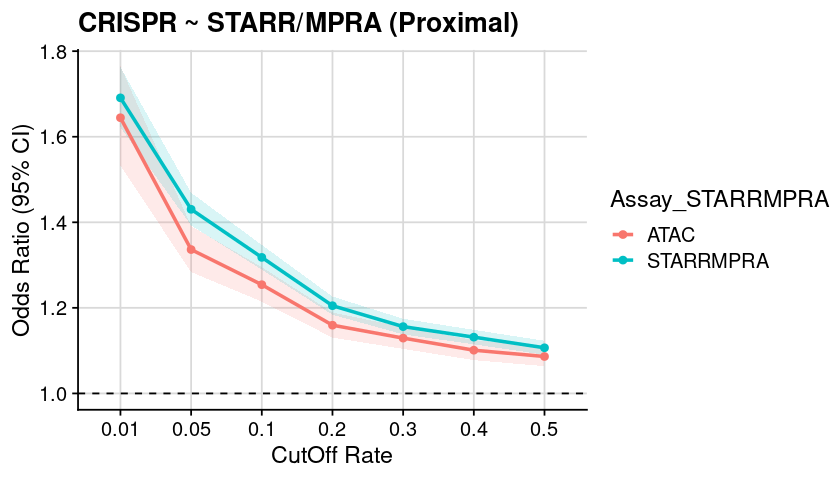

In [31]:
dat = dat_logit_stats
gpt = ggplot(dat, aes(x = CutOff_Rate, y = OR, group = Assay_STARRMPRA, color = Assay_STARRMPRA)) +
    geom_ribbon(
        aes(ymin = OR_CI_Lower, ymax = OR_CI_Upper, fill = Assay_STARRMPRA), 
        alpha = 0.15, 
        color = NA
    ) +
    geom_line(linewidth = 1) +
    geom_point(size = 1.8) +
    geom_hline(yintercept = 1, linetype = "dashed") +
    #scale_x_continuous("Hit-rate cutoff", labels = scales::percent_format(accuracy = 1)) +
    #scale_y_continuous("Log10 Odds Ratio", breaks = scales::pretty_breaks()) +
    guides(fill = "none") +
    theme_cowplot() +
    background_grid() +
    labs(x="CutOff Rate", y = "Odds Ratio (95% CI)", title = "CRISPR ~ STARR/MPRA (Proximal)")
options(repr.plot.height=4, repr.plot.width=7)
print(gpt)

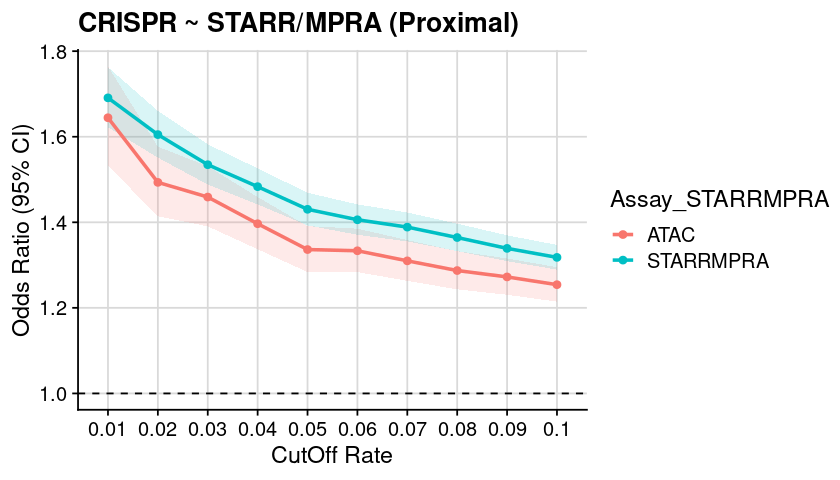

In [23]:
dat = dat_logit_stats
gpt = ggplot(dat, aes(x = CutOff_Rate, y = OR, group = Assay_STARRMPRA, color = Assay_STARRMPRA)) +
    geom_ribbon(
        aes(ymin = OR_CI_Lower, ymax = OR_CI_Upper, fill = Assay_STARRMPRA), 
        alpha = 0.15, 
        color = NA
    ) +
    geom_line(linewidth = 1) +
    geom_point(size = 1.8) +
    geom_hline(yintercept = 1, linetype = "dashed") +
    #scale_x_continuous("Hit-rate cutoff", labels = scales::percent_format(accuracy = 1)) +
    #scale_y_continuous("Log10 Odds Ratio", breaks = scales::pretty_breaks()) +
    guides(fill = "none") +
    theme_cowplot() +
    background_grid() +
    labs(x="CutOff Rate", y = "Odds Ratio (95% CI)", title = "CRISPR ~ STARR/MPRA (Proximal)")
options(repr.plot.height=4, repr.plot.width=7)
print(gpt)

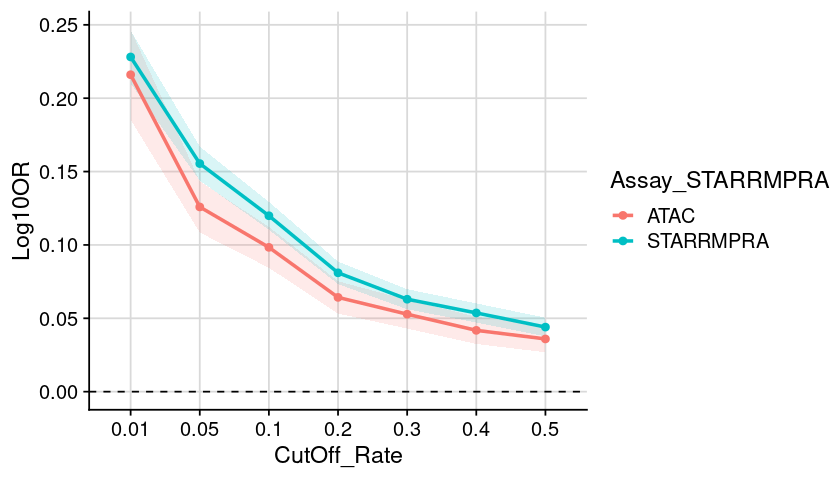

In [54]:
dat = dat_logit_stats
gpt = ggplot(dat, aes(x = CutOff_Rate, y = Log10OR, group = Assay_STARRMPRA, color = Assay_STARRMPRA)) +
    geom_ribbon(
        aes(ymin = Log10OR_CI_Lower, ymax = Log10OR_CI_Upper, fill = Assay_STARRMPRA), 
        alpha = 0.15, 
        color = NA
    ) +
    geom_line(linewidth = 1) +
    geom_point(size = 1.8) +
    geom_hline(yintercept = 0, linetype = "dashed") +
    #scale_x_continuous("Hit-rate cutoff", labels = scales::percent_format(accuracy = 1)) +
    #scale_y_continuous("Log10 Odds Ratio", breaks = scales::pretty_breaks()) +
    guides(fill = "none") +
    theme_cowplot() +
    background_grid()
options(repr.plot.height=4, repr.plot.width=7)
print(gpt)

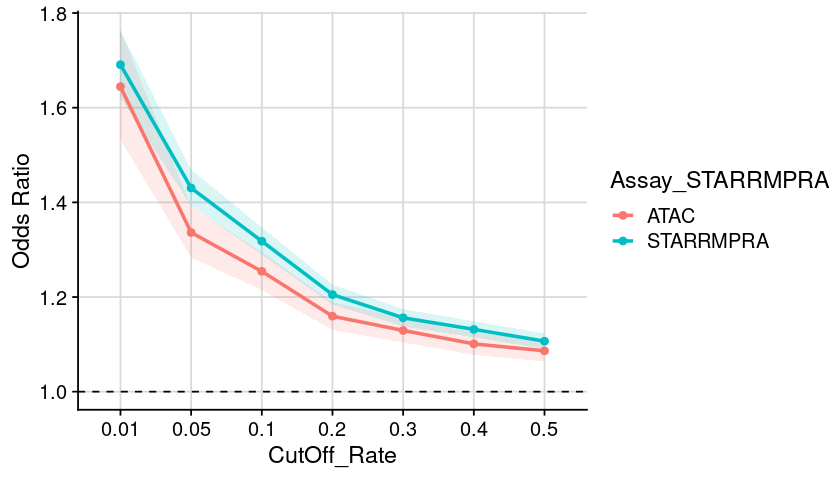

In [59]:
dat = dat_logit_stats
gpt = ggplot(dat, aes(x = CutOff_Rate, y = OR, group = Assay_STARRMPRA, color = Assay_STARRMPRA)) +
    geom_ribbon(
        aes(ymin = OR_CI_Lower, ymax = OR_CI_Upper, fill = Assay_STARRMPRA), 
        alpha = 0.15, 
        color = NA
    ) +
    geom_line(linewidth = 1) +
    geom_point(size = 1.8) +
    geom_hline(yintercept = 1, linetype = "dashed") +
    #scale_x_continuous("Hit-rate cutoff", labels = scales::percent_format(accuracy = 1)) +
    #scale_y_continuous("Log10 Odds Ratio", breaks = scales::pretty_breaks()) +
    guides(fill = "none") +
    theme_cowplot() +
    background_grid() +
    labs(y = "Odds Ratio")
options(repr.plot.height=4, repr.plot.width=7)
print(gpt)

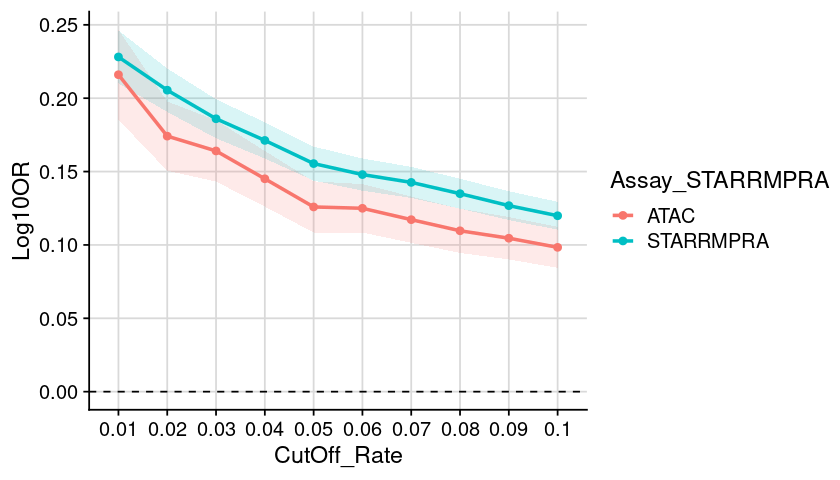

In [46]:
dat = dat_logit_stats
gpt = ggplot(dat, aes(x = CutOff_Rate, y = Log10OR, group = Assay_STARRMPRA, color = Assay_STARRMPRA)) +
    geom_ribbon(
        aes(ymin = Log10OR_CI_Lower, ymax = Log10OR_CI_Upper, fill = Assay_STARRMPRA), 
        alpha = 0.15, 
        color = NA
    ) +
    geom_line(linewidth = 1) +
    geom_point(size = 1.8) +
    geom_hline(yintercept = 0, linetype = "dashed") +
    #scale_x_continuous("Hit-rate cutoff", labels = scales::percent_format(accuracy = 1)) +
    #scale_y_continuous("Log10 Odds Ratio", breaks = scales::pretty_breaks()) +
    guides(fill = "none") +
    theme_cowplot() +
    background_grid()
options(repr.plot.height=4, repr.plot.width=7)
print(gpt)

## Execute

**Initialization**

In [12]:
num_hit_rate = 0.1

In [59]:
lst = lapply(VEC_TXT_ASSAY_OUT, function(txt_assay_out){
    ### get the output assay
    lst = lst_dat_region_score
    dat = lst[[txt_assay_out]]
    
    ### get the score of output assay
    vec = dat$Score
    vec = abs(vec)
    vec_num_score_out = vec

    ### determine score cutoff
    num_cutoff_out = quantile(vec_num_score_out, probs = 1 - num_hit_rate)

    ### setup group by cutoff
    dat$Group_CRISPR = ifelse(vec_num_score_out >= num_cutoff_out, 1, 0)
    dat = dat %>% dplyr::select(Region, Group_CRISPR) %>% dplyr::distinct()
    dat_region_group_out = dat

    ###
    lst = lapply(VEC_TXT_ASSAY_INP, function(txt_assay_inp){
        ### get the input assay
        lst = lst_dat_region_score
        dat = lst[[txt_assay_inp]]
        
        ### get the score of input assay
        dat = dat %>% 
            dplyr::mutate(Score_STARRMPRA = Score) %>%
            dplyr::select(Region, Score_STARRMPRA) %>%
            dplyr::distinct()
        dat_region_score_inp = dat
        
        ### combine group and score
        dat = dplyr::inner_join(
            dat_region_group_out,
            dat_region_score_inp,
            by = "Region"
        )
        return(dat)
    })

    ###
    dat = bind_rows(lst, .id = "Assay_STARRMPRA")
    return(dat)
})
dat = bind_rows(lst, .id = "Assay_CRISPR")

dat = dat %>% 
    dplyr::select(-Assay_CRISPR) %>%
    dplyr::distinct()

dat_region_merge = dat
print(dim(dat))
fun_display_table(head(dat))

[1] 300560      4


Assay_STARRMPRA,Region,Group_CRISPR,Score_STARRMPRA
ASTARR,chr11:4092104-4092566,0,0.5588223
ASTARR,chr11:4094204-4095676,0,2.5172737
ASTARR,chr11:4144511-4147030,0,0.1706916
ASTARR,chr11:4167268-4168022,0,-0.3593538
ASTARR,chr11:4181723-4182583,0,-0.1457068
ASTARR,chr11:4186880-4188018,0,-1.3013065


## Odds Ratio for each assay

In [60]:
dat = dat_region_merge
dat = dat %>% dplyr::mutate(
    Group_CRISPR    = factor(Group_CRISPR, levels = c(0, 1), labels = c("non-hit", "hit")),
    Assay_STARRMPRA = factor(Assay_STARRMPRA, levels = VEC_TXT_ASSAY_INP),
    Assay_STARRMPRA = relevel(Assay_STARRMPRA, ref = "ATAC")
)
###
fit = glm(
    Group_CRISPR ~ Score_STARRMPRA * Assay_STARRMPRA, 
    data   = dat,
    family = binomial(link = "logit")
)

fit_logit_split = fit
print(fit)


Call:  glm(formula = Group_CRISPR ~ Score_STARRMPRA * Assay_STARRMPRA, 
    family = binomial(link = "logit"), data = dat)

Coefficients:
                          (Intercept)                        Score_STARRMPRA  
                             -2.30159                                0.14488  
                Assay_STARRMPRAASTARR                  Assay_STARRMPRAWSTARR  
                              0.09500                                0.07275  
                 Assay_STARRMPRALMPRA                   Assay_STARRMPRATMPRA  
                              0.08835                                0.36227  
Score_STARRMPRA:Assay_STARRMPRAASTARR  Score_STARRMPRA:Assay_STARRMPRAWSTARR  
                             -0.02296                               -0.01457  
 Score_STARRMPRA:Assay_STARRMPRALMPRA   Score_STARRMPRA:Assay_STARRMPRATMPRA  
                              0.04740                                0.04731  

Degrees of Freedom: 300559 Total (i.e. Null);  300550 Residual
Null De

In [61]:
### init
fit = fit_logit_split

### get the coefficients
tab = broom::tidy(fit, conf.int = TRUE, exponentiate = FALSE)

### extract the data frame that was actually fit
dat = fit$model

### get the assays and define reference
vec_txt_assay = levels(dat$Assay_STARRMPRA)
txt_assay_ref = "ATAC"

### coefficient vector & covariance matrix
vec_num_beta = coef(fit)
mat_num_vcov = vcov(fit)

### summarize the stats
dat = purrr::map_dfr(vec_txt_assay, function(txt_assay) {
    ### extract odds ratio and test results
    if (txt_assay == txt_assay_ref) {
        num_logOR = vec_num_beta["Score_STARRMPRA"]
        num_se    = sqrt(mat_num_vcov["Score_STARRMPRA","Score_STARRMPRA"])
        num_pval  = tab %>% dplyr::filter(term == "Score_STARRMPRA") %>% pull(p.value)
    } else {
        txt_term  = paste0("Score_STARRMPRA:Assay_STARRMPRA", txt_assay)
        num_logOR = vec_num_beta["Score_STARRMPRA"] + vec_num_beta[txt_term]
        num_se    = sqrt(
            mat_num_vcov["Score_STARRMPRA","Score_STARRMPRA"] +
            mat_num_vcov[txt_term, txt_term] +
            2 * mat_num_vcov["Score_STARRMPRA", txt_term]
        )
        num_pval  <- 2 * pnorm(-abs(num_logOR / num_se))
    }

    # convert from natural log to log10 scale
    num_logOR = num_logOR / log(10)
    num_se    = num_se    / log(10)
    
    ### calculate ci and two -sided p-values
    res = tibble(
        Assay_STARRMPRA = txt_assay,
        Log10OR          = num_logOR,
        Log10OR_CI_Lower = num_logOR - 1.96 * num_se,
        Log10OR_CI_Upper = num_logOR + 1.96 * num_se,
        Pvalue         = num_pval
    )
    return(res)
})

dat_stats_split = dat
dat

Assay_STARRMPRA,Log10OR,Log10OR_CI_Lower,Log10OR_CI_Upper,Pvalue
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
ATAC,0.06292138,0.05565972,0.07018305,1.094651e-64
ASTARR,0.05295119,0.04469278,0.06120961,3.202338e-36
WSTARR,0.05659248,0.04710239,0.06608257,1.466095e-31
LMPRA,0.08350696,0.07217935,0.09483457,2.540253e-47
TMPRA,0.08346763,0.01544346,0.15149179,1.617349e-02


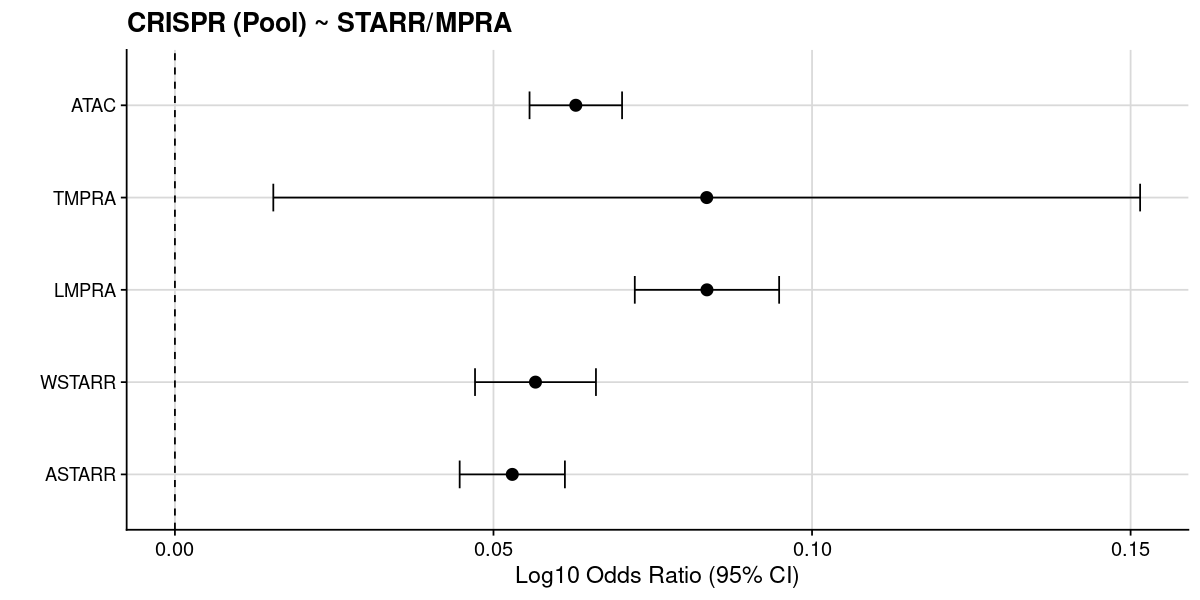

In [62]:
dat = dat_stats_split
dat = dat %>% dplyr::mutate(
    Assay_STARRMPRA = factor(Assay_STARRMPRA, levels=VEC_TXT_ASSAY_INP)
)

gpt = ggplot(dat, aes(x = Log10OR, y = Assay_STARRMPRA)) +
    geom_point(size = 3) +
    geom_errorbarh(aes(xmin = Log10OR_CI_Lower, xmax = Log10OR_CI_Upper), height = 0.3) +
    geom_vline(xintercept = 0, linetype="dashed") +
    labs(x = "Log10 Odds Ratio (95% CI)", y = "", title = "CRISPR (Pool) ~ STARR/MPRA") +
    theme_cowplot() +
    background_grid() +
    theme(
        strip.text = element_text(face = "bold"),
        axis.text.y = element_text(size = 11)
    )

###
gpt_logit_split = gpt
options(repr.plot.height=5, repr.plot.width=10)
print(gpt)

## Odds Ratio pooled

In [65]:
dat = dat_region_merge
print(dim(dat))
head(dat)

[1] 300560      4


Assay_STARRMPRA,Region,Group_CRISPR,Score_STARRMPRA
<chr>,<chr>,<dbl>,<dbl>
ASTARR,chr11:4092104-4092566,0,0.5588223
ASTARR,chr11:4094204-4095676,0,2.5172737
ASTARR,chr11:4144511-4147030,0,0.1706916
ASTARR,chr11:4167268-4168022,0,-0.3593538
ASTARR,chr11:4181723-4182583,0,-0.1457068
ASTARR,chr11:4186880-4188018,0,-1.3013065


In [66]:
dat = dat_region_merge
dat = dat %>% 
    dplyr::mutate(
        Assay_STARRMPRA = ifelse(
            Assay_STARRMPRA == "ATAC",
            "ATAC", 
            "STARRMPRA"
        )
    ) %>%
    dplyr::mutate(
        Group_CRISPR    = factor(Group_CRISPR, levels = c(0, 1), labels = c("non-hit", "hit")),
        Assay_STARRMPRA = factor( Assay_STARRMPRA, levels = c("ATAC", "STARRMPRA")),
        Assay_STARRMPRA = relevel(Assay_STARRMPRA, ref = "ATAC")
    ) %>%
    dplyr::distinct()
print(dim(dat))

###
fit = glm(
    Group_CRISPR ~ Score_STARRMPRA * Assay_STARRMPRA, 
    data   = dat,
    family = binomial(link = "logit")
)

fit_logit_pool = fit
print(fit)

[1] 300560      4

Call:  glm(formula = Group_CRISPR ~ Score_STARRMPRA * Assay_STARRMPRA, 
    family = binomial(link = "logit"), data = dat)

Coefficients:
                             (Intercept)  
                               -2.301592  
                         Score_STARRMPRA  
                                0.144882  
                Assay_STARRMPRASTARRMPRA  
                                0.084828  
Score_STARRMPRA:Assay_STARRMPRASTARRMPRA  
                               -0.004958  

Degrees of Freedom: 300559 Total (i.e. Null);  300556 Residual
Null Deviance:	    198800 
Residual Deviance: 198000 	AIC: 198000


In [67]:
### init
fit = fit_logit_pool

### get the coefficients
tab = broom::tidy(fit, conf.int = TRUE, exponentiate = FALSE)

### extract the data frame that was actually fit
dat = fit$model

### get the assays and define reference
vec_txt_assay = levels(dat$Assay_STARRMPRA)
txt_assay_ref = "ATAC"

### coefficient vector & covariance matrix
vec_num_beta = coef(fit)
mat_num_vcov = vcov(fit)

### summarize the stats
dat = purrr::map_dfr(vec_txt_assay, function(txt_assay) {
    ### extract odds ratio and test results
    if (txt_assay == txt_assay_ref) {
        num_logOR = vec_num_beta["Score_STARRMPRA"]
        num_se    = sqrt(mat_num_vcov["Score_STARRMPRA","Score_STARRMPRA"])
        num_pval  = tab %>% dplyr::filter(term == "Score_STARRMPRA") %>% pull(p.value)
    } else {
        txt_term  = paste0("Score_STARRMPRA:Assay_STARRMPRA", txt_assay)
        num_logOR = vec_num_beta["Score_STARRMPRA"] + vec_num_beta[txt_term]
        num_se    = sqrt(
            mat_num_vcov["Score_STARRMPRA","Score_STARRMPRA"] +
            mat_num_vcov[txt_term, txt_term] +
            2 * mat_num_vcov["Score_STARRMPRA", txt_term]
        )
        num_pval  <- 2 * pnorm(-abs(num_logOR / num_se))
    }

    # convert from natural log to log10 scale
    num_logOR = num_logOR / log(10)
    num_se    = num_se    / log(10)
    
    ### calculate ci and two -sided p-values
    res = tibble(
        Assay_STARRMPRA = txt_assay,
        Log10OR          = num_logOR,
        Log10OR_CI_Lower = num_logOR - 1.96 * num_se,
        Log10OR_CI_Upper = num_logOR + 1.96 * num_se,
        Pvalue           = num_pval,
        Size             = nrow(dat)
    )
    return(res)
})

dat_stats_pool = dat
dat

Assay_STARRMPRA,Log10OR,Log10OR_CI_Lower,Log10OR_CI_Upper,Pvalue,Size
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
ATAC,0.06292138,0.05565972,0.07018305,1.094651e-64,300560
STARRMPRA,0.06076825,0.05535782,0.06617868,2.109263e-107,300560


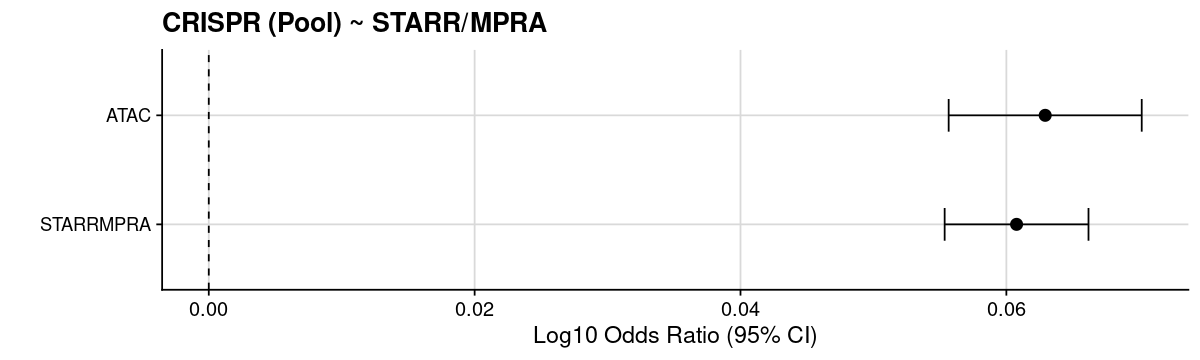

In [68]:
dat = dat_stats_pool
dat = dat %>% dplyr::mutate(
    Assay_STARRMPRA = factor(Assay_STARRMPRA, levels=c("STARRMPRA", "ATAC"))
)

gpt = ggplot(dat, aes(x = Log10OR, y = Assay_STARRMPRA)) +
    geom_point(size = 3) +
    geom_errorbarh(aes(xmin = Log10OR_CI_Lower, xmax = Log10OR_CI_Upper), height = 0.3) +
    geom_vline(xintercept = 0, linetype="dashed") +
    labs(x = "Log10 Odds Ratio (95% CI)", y = "", title = "CRISPR (Pool) ~ STARR/MPRA") +
    theme_cowplot() +
    background_grid() +
    theme(
        strip.text = element_text(face = "bold"),
        axis.text.y = element_text(size = 11)
    )

###
gpt_logit_pool = gpt
options(repr.plot.height=3, repr.plot.width=10)
print(gpt)

## Merge plot

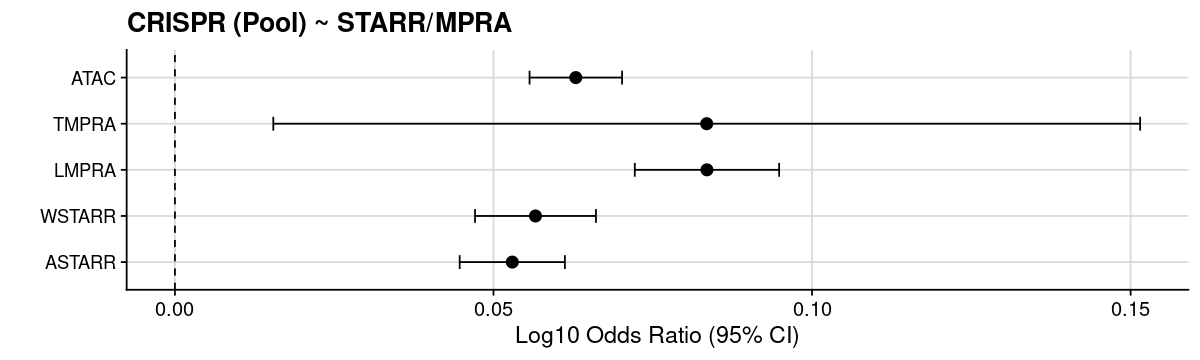

In [69]:
gpt_logit_split

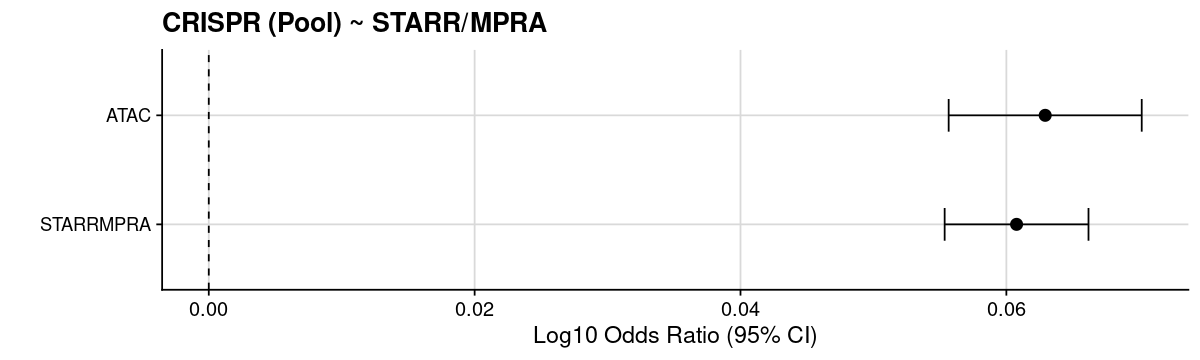

In [70]:
gpt_logit_pool

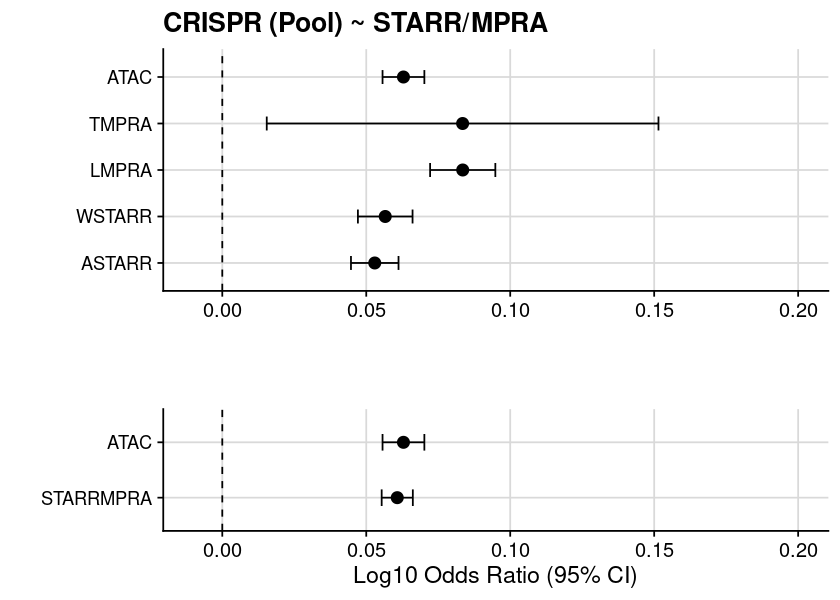

In [71]:
lst = list(gpt_logit_split, gpt_logit_pool)
lst = lapply(lst, function(gpt){
    gpt = gpt +
        scale_x_continuous(
            breaks = seq(0, 0.2, 0.05), 
            limits = c(-0.01, 0.2)
        )
    return(gpt)
})
lst[[1]] = lst[[1]] + labs(x     = "")
lst[[2]] = lst[[2]] + labs(title = "")

plt = plot_grid(
    plotlist = lst, 
    rel_heights = c(1.5, 1),
    ncol  = 1,
    align = "v"
)

options(repr.plot.height=5, repr.plot.width=7)
print(plt)